<a href="https://colab.research.google.com/github/Alejocas17/NeuralNetworks/blob/main/miniproyecto1_alejandroCastillo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Link to download the requiered files:
https://drive.google.com/drive/folders/1fo699FdvB1Y69uAY4uCJyzRtdi3h67bd?usp=sharing

Dataset Link:
https://www.kaggle.com/arunrk7/surface-crack-detection

# Librerías

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras import initializers
from keras import optimizers
from keras.callbacks import ModelCheckpoint

tf.test.gpu_device_name()

'/device:GPU:0'

# Introducción del dataset

## Para entorno de ejecución de colab

In [ ]:
#for hosted runtime
#Training dataset
dataset_train_directory = '/content/drive/MyDrive/Colab Notebooks/NN/Proyecto_1/Dataset/train/'
training_ds=tf.keras.preprocessing.image_dataset_from_directory(
    dataset_train_directory, labels='inferred',image_size=(64,64),
    validation_split=0.2,
    subset='training',
    seed=1,
    color_mode='grayscale',
    batch_size=1,
    label_mode='categorical',
    class_names=['Negative','Positive'])
#validation dataset
dataset_test_directory = '/content/drive/MyDrive/Colab Notebooks/NN/Proyecto_1/Dataset/train/'
validation_ds=tf.keras.preprocessing.image_dataset_from_directory(
    dataset_test_directory,
    labels='inferred',
    image_size=(64,64),
    validation_split=0.2,
    subset='validation',
    seed=1,
    color_mode='grayscale',
    batch_size=1,
    label_mode='categorical'
    class_names=['Negative','Positive'])
#Testing dataset
dataset_test_directory = '/content/drive/MyDrive/Colab Notebooks/NN/Proyecto_1/Dataset/test/'
testing_ds=tf.keras.preprocessing.image_dataset_from_directory(
    dataset_test_directory,
    labels='inferred',
    image_size=(64,64),
    validation_split=0.3,
    subset='validation',
    seed=1,
    color_mode='grayscale',
    batch_size=1,
    label_mode='categorical',
    class_names=['Negative','Positive'])


## Para entorno de ejecución local

In [2]:
#for local runtime
#Training dataset
local_dataset_train_directory = '/Users/alejo/Downloads/dataset/Dataset/train/'
training_ds=tf.keras.preprocessing.image_dataset_from_directory(
    local_dataset_train_directory,
    labels='inferred',
    image_size=(64,64),
    validation_split=0.2,
    subset='training',
    seed=1,
    shuffle=True,
    color_mode='grayscale',
    batch_size=1,
    label_mode='categorical',
    class_names=['Negative','Positive'])
#Testing dataset
local_dataset_train_directory = '/Users/alejo/Downloads/dataset/Dataset/train/'
validation_ds=tf.keras.preprocessing.image_dataset_from_directory(
    local_dataset_train_directory,
    labels='inferred',
    image_size=(64,64),
    validation_split=0.2,
    subset='validation',
    seed=1,
    shuffle=True,
    color_mode='grayscale',
    batch_size=1,
    label_mode='categorical',
    class_names=['Negative','Positive'])
#Validation dataset
local_dataset_test_directory = '/Users/alejo/Downloads/dataset/Dataset/test/'
testing_ds=tf.keras.preprocessing.image_dataset_from_directory(
    local_dataset_test_directory,
    labels='inferred',
    image_size=(64,64),
    validation_split=0.3, 
    subset='validation',
    shuffle=True,
    seed=1,
    color_mode='grayscale',
    batch_size=1,
    label_mode='categorical',
    class_names=['Negative','Positive'])

Found 24000 files belonging to 2 classes.
Using 19200 files for training.
Found 24000 files belonging to 2 classes.
Using 4800 files for validation.
Found 16000 files belonging to 2 classes.
Using 4800 files for validation.


#Preprocessing

In [3]:
train_images = []
train_labels = []
val_images = []
val_labels = []
test_images = []
test_labels = []

for x, y in training_ds:
  train_images.append(x)
  train_labels.append(y)

for x, y in validation_ds:
  val_images.append(x)
  val_labels.append(y)
  
for x, y in testing_ds:
  test_images.append(x)
  test_labels.append(y)

train_images = np.concatenate(train_images)
train_labels = np.concatenate(train_labels)

val_images = np.concatenate(val_images)
val_labels = np.concatenate(val_labels)

test_images = np.concatenate(test_images)
test_labels = np.concatenate(test_labels)

In [4]:
# Reshaping the images
x_train=train_images.reshape((len(train_images), np.prod(train_images.shape[1:])))
x_test=test_images.reshape((len(test_images), np.prod(test_images.shape[1:])))
x_val=val_images.reshape((len(val_images), np.prod(val_images.shape[1:])))
# Rescaling the images
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
x_val = x_val.astype('float32')/255
# storaging labels in structured labels
y_train=(train_labels)
y_test=(test_labels)
y_val=(val_labels)

C:\Python3\lib\site-packages\matplotlib\text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


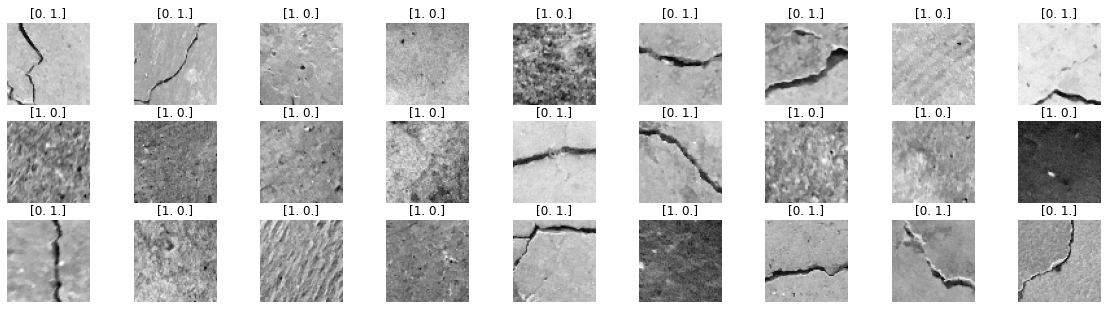

In [5]:
# preview labeled data
plt.figure(figsize=(20, 16))
for i in range(27):
        
        ax = plt.subplot(9, 9, i + 1)
        plt.imshow(x_test[i].reshape((64,64)))
        plt.gray()
        plt.title(y_test[i])
        plt.axis("off")

#Autoencoder

In [21]:
# Generación de Autoencoder
first_encoding_dim = 1024
second_encoding_dim = 256
input_img = keras.Input(shape=(64*64,),name='input_layer')
encoded_first = layers.Dense(units=first_encoding_dim, activation='relu',name='encoded_first')(input_img)
encoded_second = layers.Dense(units=second_encoding_dim, activation='relu',name='encoded_second')(encoded_first)
decoded_second = layers.Dense(units=first_encoding_dim, activation='relu',name='decoded_second')(encoded_second)
decoded_first = layers.Dense(units=64*64, activation='sigmoid',name='decoded_first')(decoded_second)

In [22]:
full_autoencoder = keras.Model(input_img, decoded_first)
encoder = keras.Model(input_img, encoded_second)
full_autoencoder.summary()
encoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 4096)]            0         
_________________________________________________________________
encoded_first (Dense)        (None, 1024)              4195328   
_________________________________________________________________
encoded_second (Dense)       (None, 256)               262400    
_________________________________________________________________
decoded_second (Dense)       (None, 1024)              263168    
_________________________________________________________________
decoded_first (Dense)        (None, 4096)              4198400   
Total params: 8,919,296
Trainable params: 8,919,296
Non-trainable params: 0
_________________________________________________________________
Model: "model_4"
_________________________________________________________________
Layer (type)                 Out

In [23]:
# # Diseño del decoder
decoded_input = keras.Input(shape=(second_encoding_dim,))
decoded_second = full_autoencoder.layers[-2]
decoded_first = full_autoencoder.layers[-1]
decoder = keras.Model(decoded_input, decoded_first(decoded_second(decoded_input)))

In [24]:
full_autoencoder.compile(
    optimizer='adam',
    loss='mse',
    metrics=['accuracy'])

In [25]:
full_autoencoder.fit(x_train, x_train, epochs=100, batch_size=512, shuffle=True,
                validation_data=(x_val, x_val))

Epoch 1/100
38/38 [==============================] - 2s 36ms/step - loss: 0.0157 - accuracy: 2.0833e-04 - val_loss: 0.0129 - val_accuracy: 4.1667e-04
Epoch 2/100
38/38 [==============================] - 1s 31ms/step - loss: 0.0123 - accuracy: 1.5625e-04 - val_loss: 0.0117 - val_accuracy: 2.0833e-04
Epoch 3/100
38/38 [==============================] - 1s 31ms/step - loss: 0.0115 - accuracy: 1.0417e-04 - val_loss: 0.0109 - val_accuracy: 6.2500e-04
Epoch 4/100
38/38 [==============================] - 1s 31ms/step - loss: 0.0109 - accuracy: 2.6042e-04 - val_loss: 0.0102 - val_accuracy: 0.0000e+00
Epoch 5/100
38/38 [==============================] - 1s 31ms/step - loss: 0.0104 - accuracy: 4.1667e-04 - val_loss: 0.0096 - val_accuracy: 2.0833e-04
Epoch 6/100
38/38 [==============================] - 1s 32ms/step - loss: 0.0097 - accuracy: 1.5625e-04 - val_loss: 0.0090 - val_accuracy: 6.2500e-04
Epoch 7/100
38/38 [==============================] - 1s 31ms/step - loss: 0.0090 - accuracy: 1.5625e

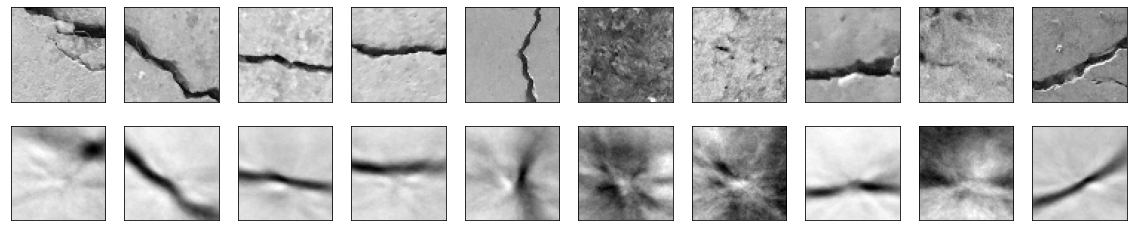

In [26]:
decoded_imgs = full_autoencoder.predict(x_val)
n =10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_val[i].reshape(64, 64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(64, 64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
#Saving the models
encoder.save('/Users/alejo/Documents/encoder.h5')
full_autoencoder.save('/Users/alejo/Documents/full_auto.h5')

# Classifier Training




In [6]:
#loading the encoder model
encoder_model1=keras.models.load_model('/Users/alejo/Documents/full_auto.h5')
encoder_model1.load_weights('/Users/alejo/Documents/full_auto.h5')
# full_autoencoder_model=keras.models.load_model('/Users/alejo/Documents/full_auto.h5')
# full_autoencoder_model.load_weights('/Users/alejo/Documents/full_auto.h5')
encoder_model2=keras.models.load_model('/Users/alejo/Documents/full_auto.h5')
encoder_model2.load_weights('/Users/alejo/Documents/full_auto.h5')
encoder_model3=keras.models.load_model('/Users/alejo/Documents/full_auto.h5')
encoder_model3.load_weights('/Users/alejo/Documents/full_auto.h5')

In [7]:

initializer1 = tf.keras.initializers.random_uniform(minval=-0.05, maxval=0.05, seed=None)
regularizer1 = tf.keras.regularizers.l1_l2()
classifier1 = layers.Dense(
    units=2,
    kernel_initializer=initializer1,
    activation='softmax',
    kernel_regularizer=regularizer1)(encoder_model1.get_layer('encoded_second').get_output_at(node_index=0))
classifier1_model = keras.Model(encoder_model1.get_layer('input_layer').get_output_at(node_index=0), classifier1)

In [8]:

initializer2 = tf.keras.initializers.random_uniform(minval=-0.05, maxval=0.05, seed=None)
regularizer2 = tf.keras.regularizers.l1_l2()
classifier2 = layers.Dense(
    units=2,
    kernel_initializer=initializer2,
    activation='softmax',
    kernel_regularizer=regularizer2)(encoder_model2.get_layer('encoded_second').get_output_at(node_index=0))
classifier2_model = keras.Model(encoder_model2.get_layer('input_layer').get_output_at(node_index=0), classifier2)

In [9]:

initializer3 = tf.keras.initializers.random_uniform(minval=-0.05, maxval=0.05, seed=None)
regularizer3 = tf.keras.regularizers.l1_l2()
classifier3 = layers.Dense(
    units=2,
    kernel_initializer=initializer3,
    activation='softmax',
    kernel_regularizer=regularizer3)(encoder_model3.get_layer('encoded_second').get_output_at(node_index=0))
classifier3_model = keras.Model(encoder_model3.get_layer('input_layer').get_output_at(node_index=0), classifier3)

In [10]:
#Training First Model
filepath="/Users/alejo/Documents/weights1.best.hdf5"
checkpoint1 = ModelCheckpoint(filepath, monitor='accuracy', verbose=1, save_best_only=True,
mode='max')
callbacks_list1 = [checkpoint1]
classifier1_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history1=classifier1_model.fit(x_train, y_train, epochs=150, batch_size=32, shuffle=True,
               validation_data=(x_val, y_val),callbacks=callbacks_list1)

Epoch 1/150
600/600 [==============================] - 3s 5ms/step - loss: 0.4461 - accuracy: 0.8112 - val_loss: 0.5721 - val_accuracy: 0.6346

Epoch 00001: accuracy improved from -inf to 0.81125, saving model to /Users/alejo/Documents\weights1.best.hdf5
Epoch 2/150
600/600 [==============================] - 3s 5ms/step - loss: 0.3269 - accuracy: 0.8789 - val_loss: 0.3272 - val_accuracy: 0.9052

Epoch 00002: accuracy improved from 0.81125 to 0.87891, saving model to /Users/alejo/Documents\weights1.best.hdf5
Epoch 3/150
600/600 [==============================] - 3s 5ms/step - loss: 0.3049 - accuracy: 0.8938 - val_loss: 0.2661 - val_accuracy: 0.9000

Epoch 00003: accuracy improved from 0.87891 to 0.89375, saving model to /Users/alejo/Documents\weights1.best.hdf5
Epoch 4/150
600/600 [==============================] - 3s 5ms/step - loss: 0.2952 - accuracy: 0.8928 - val_loss: 0.2474 - val_accuracy: 0.9142

Epoch 00004: accuracy did not improve from 0.89375
Epoch 5/150
600/600 [=============

In [11]:
#Training Second Model
filepath="/Users/alejo/Documents/weights2.best.hdf5"
checkpoint2 = ModelCheckpoint(filepath, monitor='accuracy', verbose=1, save_best_only=True,
mode='max')
callbacks_list2 = [checkpoint2]
classifier2_model.compile(optimizer='adagrad',  loss='categorical_crossentropy', metrics=['accuracy'])
history2=classifier2_model.fit(x_train, y_train, epochs=150, batch_size=32, shuffle=True,
               validation_data=(x_val, y_val),callbacks=callbacks_list2)

Epoch 1/150
600/600 [==============================] - 3s 5ms/step - loss: 0.7392 - accuracy: 0.7331 - val_loss: 0.6462 - val_accuracy: 0.8048

Epoch 00001: accuracy improved from -inf to 0.73312, saving model to /Users/alejo/Documents\weights2.best.hdf5
Epoch 2/150
600/600 [==============================] - 3s 4ms/step - loss: 0.5880 - accuracy: 0.8371 - val_loss: 0.5281 - val_accuracy: 0.8481

Epoch 00002: accuracy improved from 0.73312 to 0.83714, saving model to /Users/alejo/Documents\weights2.best.hdf5
Epoch 3/150
600/600 [==============================] - 3s 4ms/step - loss: 0.4934 - accuracy: 0.8543 - val_loss: 0.4545 - val_accuracy: 0.8698

Epoch 00003: accuracy improved from 0.83714 to 0.85427, saving model to /Users/alejo/Documents\weights2.best.hdf5
Epoch 4/150
600/600 [==============================] - 3s 4ms/step - loss: 0.4365 - accuracy: 0.8646 - val_loss: 0.4106 - val_accuracy: 0.8825

Epoch 00004: accuracy improved from 0.85427 to 0.86464, saving model to /Users/alejo/

In [12]:
#Training Third Model
filepath="/Users/alejo/Documents/weights3.best.hdf5"
checkpoint3 = ModelCheckpoint(filepath, monitor='accuracy', verbose=1, save_best_only=True,
mode='max')
callbacks_list3 = [checkpoint3]
classifier3_model.compile(optimizer='adamax', loss='categorical_crossentropy', metrics=['accuracy'])
history3=classifier3_model.fit(x_train, y_train, epochs=150, batch_size=32, shuffle=True,
               validation_data=(x_val, y_val),callbacks=callbacks_list3)

Epoch 1/150
600/600 [==============================] - 4s 6ms/step - loss: 0.4071 - accuracy: 0.8458 - val_loss: 0.2940 - val_accuracy: 0.9269

Epoch 00001: accuracy improved from -inf to 0.84583, saving model to /Users/alejo/Documents\weights3.best.hdf5
Epoch 2/150
600/600 [==============================] - 3s 5ms/step - loss: 0.2561 - accuracy: 0.9174 - val_loss: 0.2348 - val_accuracy: 0.9383

Epoch 00002: accuracy improved from 0.84583 to 0.91740, saving model to /Users/alejo/Documents\weights3.best.hdf5
Epoch 3/150
600/600 [==============================] - 3s 5ms/step - loss: 0.2214 - accuracy: 0.9328 - val_loss: 0.2331 - val_accuracy: 0.9421

Epoch 00003: accuracy improved from 0.91740 to 0.93281, saving model to /Users/alejo/Documents\weights3.best.hdf5
Epoch 4/150
600/600 [==============================] - 3s 5ms/step - loss: 0.2091 - accuracy: 0.9380 - val_loss: 0.2492 - val_accuracy: 0.9083

Epoch 00004: accuracy improved from 0.93281 to 0.93802, saving model to /Users/alejo/

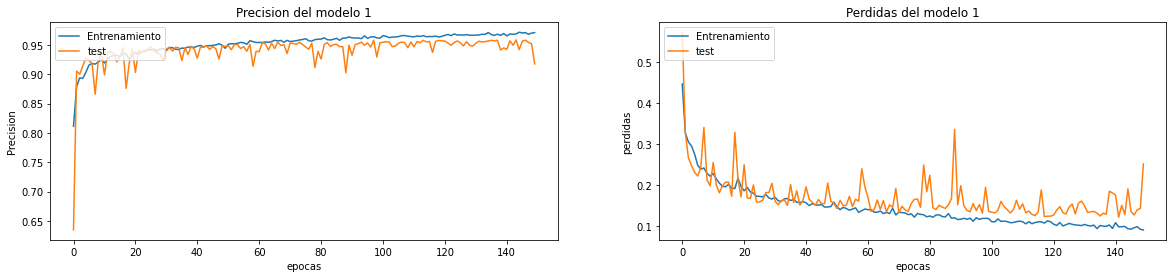

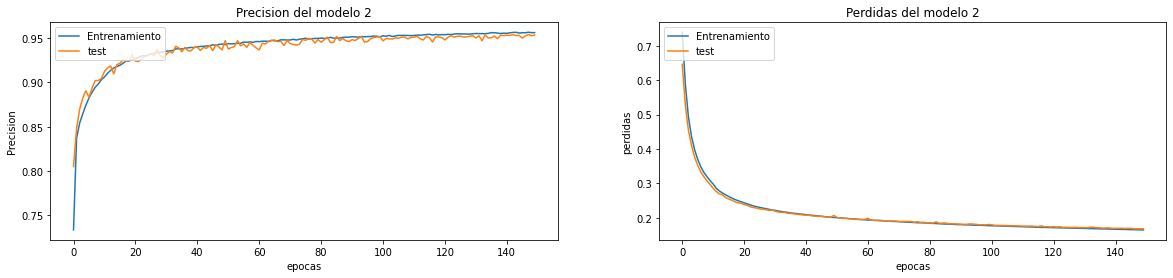

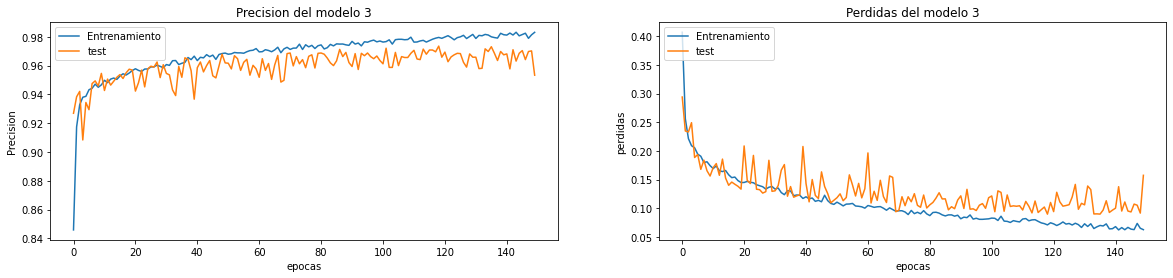

In [13]:
#plotting training results
#first model
plt.figure(figsize=(20, 4))
plt.subplot(1,2,1)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Precision del modelo 1')
plt.ylabel('Precision')
plt.xlabel('epocas')
plt.legend(['Entrenamiento', 'test'], loc='upper left')
plt.subplot(1,2,2)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Perdidas del modelo 1')
plt.ylabel('perdidas')
plt.xlabel('epocas')
plt.legend(['Entrenamiento', 'test'], loc='upper left')
plt.show()
#second model
plt.figure(figsize=(20, 4))
plt.subplot(1,2,1)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Precision del modelo 2')
plt.ylabel('Precision')
plt.xlabel('epocas')
plt.legend(['Entrenamiento', 'test'], loc='upper left')
plt.subplot(1,2,2)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Perdidas del modelo 2')
plt.ylabel('perdidas')
plt.xlabel('epocas')
plt.legend(['Entrenamiento', 'test'], loc='upper left')
plt.show()
#third model
plt.figure(figsize=(20, 4))
plt.subplot(1,2,1)
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Precision del modelo 3')
plt.ylabel('Precision')
plt.xlabel('epocas')
plt.legend(['Entrenamiento', 'test'], loc='upper left')
plt.subplot(1,2,2)
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Perdidas del modelo 3')
plt.ylabel('perdidas')
plt.xlabel('epocas')
plt.legend(['Entrenamiento', 'test'], loc='upper left')
plt.show()

In [14]:
#Saving the models
classifier1_model.save('/Users/alejo/Documents/classifier1.h5')
classifier2_model.save('/Users/alejo/Documents/classifier2.h5')
classifier3_model.save('/Users/alejo/Documents/classifier3.h5')

# Networks Performance

In [15]:
model1=keras.models.load_model('/Users/alejo/Documents/classifier1.h5')
model1.load_weights('/Users/alejo/Documents/weights1.best.hdf5')
model2=keras.models.load_model('/Users/alejo/Documents/classifier2.h5')
model2.load_weights('/Users/alejo/Documents/weights2.best.hdf5')
model3=keras.models.load_model('/Users/alejo/Documents/classifier3.h5')
model3.load_weights('/Users/alejo/Documents/weights3.best.hdf5')

150/150 [==============================] - 0s 1ms/step - loss: 0.3164 - accuracy: 0.9065


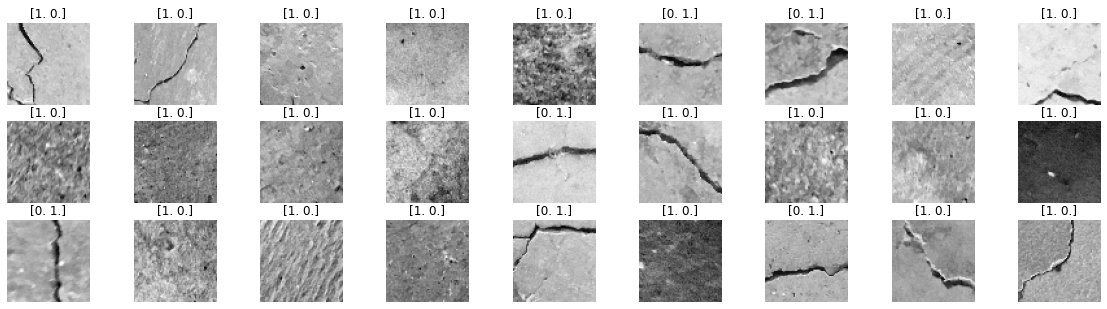

In [16]:
train_acc_list, test_acc_list = [], []

train_loss, train_acc = model1.evaluate(x_train, y_train)
test_loss, test_acc = model1.evaluate(x_test, y_test)

train_acc_list.append(train_acc)
test_acc_list.append(test_acc)

plt.figure(figsize=(20, 16))
for l in range(27):
        
        ax = plt.subplot(9, 9, l + 1)
        plt.imshow(x_test[l].reshape((64,64)))
        plt.title(np.round(model1.predict(x_test)[l]))
        plt.axis("off")

150/150 [==============================] - 0s 1ms/step - loss: 0.2110 - accuracy: 0.9356


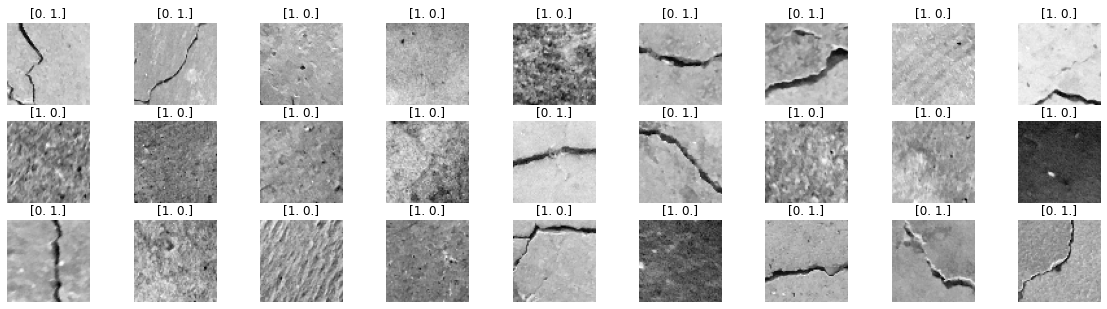

In [17]:
train_acc_list, test_acc_list = [], []

train_loss, train_acc = model2.evaluate(x_train, y_train)
test_loss, test_acc = model2.evaluate(x_test, y_test)

train_acc_list.append(train_acc)
test_acc_list.append(test_acc)

plt.figure(figsize=(20, 16))
for l in range(27):
        
        ax = plt.subplot(9, 9, l + 1)
        plt.imshow(x_test[l].reshape((64,64)))
        plt.title(np.round(model2.predict(x_test)[l]))
        plt.axis("off")

150/150 [==============================] - 0s 1ms/step - loss: 0.1919 - accuracy: 0.9373


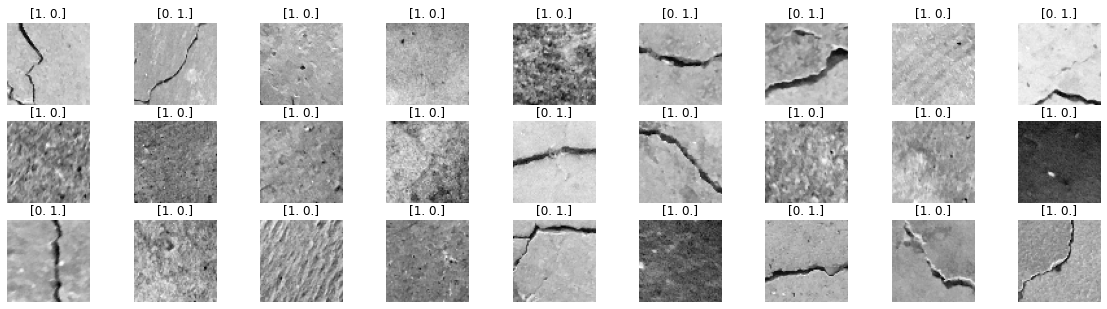

In [18]:
train_acc_list, test_acc_list = [], []

train_loss, train_acc = model3.evaluate(x_train, y_train)
test_loss, test_acc = model3.evaluate(x_test, y_test)

train_acc_list.append(train_acc)
test_acc_list.append(test_acc)

plt.figure(figsize=(20, 16))
for l in range(27):
        
        ax = plt.subplot(9, 9, l + 1)
        plt.imshow(x_test[l].reshape((64,64)))
        plt.title(np.round(model3.predict(x_test)[l]))
        plt.axis("off")

#Protocolo de prueba para el mejor modelo

---



In [2]:
#loading best model fitted
path_to_model='/content/drive/MyDrive/Colab Notebooks/NN/Proyecto_1/classifier3.h5'
path_to_best_weights='/content/drive/MyDrive/Colab Notebooks/NN/Proyecto_1/weights3.best.hdf5'
model3=keras.models.load_model(path_to_model)
model3.load_weights(path_to_best_weights)

In [100]:
# np.save('/content/drive/MyDrive/Colab Notebooks/NN/Proyecto_1/x_test.npy',x_test)
# np.save('/content/drive/MyDrive/Colab Notebooks/NN/Proyecto_1/y_test.npy',y_test)
y_test=np.load('/content/drive/MyDrive/Colab Notebooks/NN/Proyecto_1/y_test.npy').reshape(4800,2)
x_test=np.load('/content/drive/MyDrive/Colab Notebooks/NN/Proyecto_1/x_test.npy').reshape(4800,4096)

150/150 [==============================] - 1s 3ms/step - loss: 0.1919 - accuracy: 0.9373


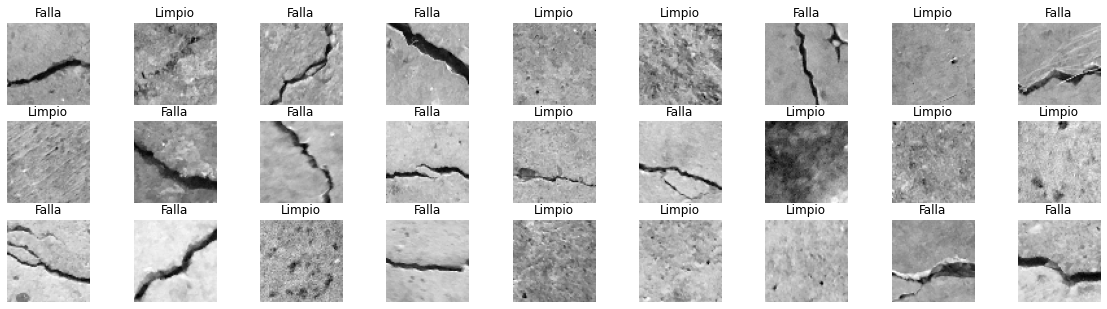

In [128]:
test_acc_list = []
test_acc = model3.evaluate(x_test,y_test)
test_acc_list.append(test_acc)
plt.figure(figsize=(20, 16))
n = 27 #muestras que se desean plotear
row=int(np.floor(n/3))
for l in range(n):
  if (int(np.round(model3.predict(x_test)[l+1000,0])) == 0):
    tipo = "Falla"
  else:
    tipo = "Limpio"
  ax = plt.subplot(row,row,l+1)
  plt.imshow(x_test[l+1000].reshape((64,64)))
  plt.gray()
  plt.title(tipo)
  plt.axis("off")